## **<div style="text-align: center; color: black; font-size: 30px;"> Customer Feedback & Sentiment</div>**

#### Import the Library

In [3]:
import re
import numpy as np
import pandas as pd
from faker import Faker
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#### Create Synthetic Dataset

In [5]:
# Set random seed for reproducibility
np.random.seed(42)
fake = Faker()

In [6]:
# Number of records
num_records = 5000

In [7]:
# Generate synthetic data
data = {
    "Review_ID": [f"RID{str(i).zfill(4)}" for i in range(1, num_records + 1)],
    "Customer_ID": [f"CID{str(i).zfill(4)}" for i in range(1, num_records + 1)],
    "Review_Text": [fake.text(max_nb_chars=200) for _ in range(num_records)],
    "Sentiment_Label": np.random.choice(["Positive", "Negative", "Neutral"], size=num_records),
    "Rating": np.random.randint(1, 6, size=num_records),
    "Service_Type": np.random.choice(["Claim", "Policy Purchase", "Customer Support"], size=num_records)
}


In [8]:
# Create DataFrame
df_feedback = pd.DataFrame(data)

In [9]:
# Save dataset to CSV file
df_feedback.to_csv('synthetic_Customer _Feedback_Sentiment_data.csv', index=False)

#### Data Analysis & Inspection

In [11]:
# printing the first 5 rows of the dataframe
df_feedback.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,RID0001,CID0001,Agree government cover east prevent know must....,Neutral,3,Customer Support
1,RID0002,CID0002,Record assume party impact. Behavior tell most...,Positive,5,Claim
2,RID0003,CID0003,Word send act close audience use growth. Daugh...,Neutral,3,Policy Purchase
3,RID0004,CID0004,Trial possible baby husband. Positive all stop...,Neutral,4,Claim
4,RID0005,CID0005,Step administration take two. Them south natio...,Positive,5,Customer Support


In [12]:
# number of rows and columns in the data frame
df_feedback.shape

(5000, 6)

In [13]:
# getting more information about the dataset
df_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_ID        5000 non-null   object
 1   Customer_ID      5000 non-null   object
 2   Review_Text      5000 non-null   object
 3   Sentiment_Label  5000 non-null   object
 4   Rating           5000 non-null   int32 
 5   Service_Type     5000 non-null   object
dtypes: int32(1), object(5)
memory usage: 215.0+ KB


In [14]:
# checking the missing values in each column
df_feedback.isnull().sum()

Review_ID          0
Customer_ID        0
Review_Text        0
Sentiment_Label    0
Rating             0
Service_Type       0
dtype: int64

In [15]:
# Count the total number of duplicate rows in the dataset.
df_feedback.duplicated().sum()

0

In [16]:
import warnings
warnings.filterwarnings("ignore")


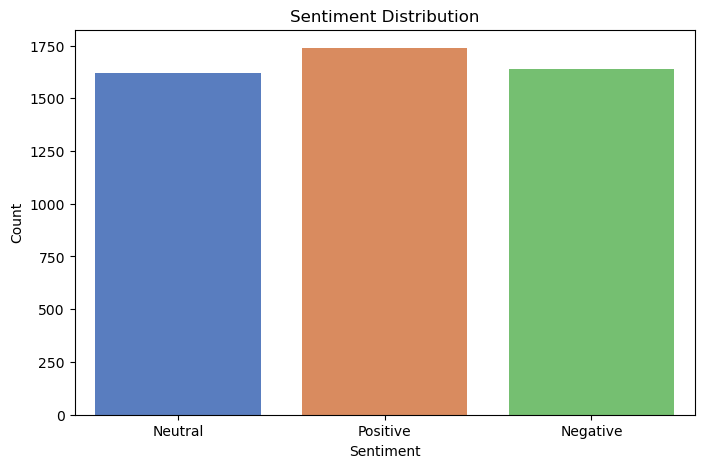

In [17]:
# Count plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment_Label", data=df_feedback, palette="muted")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Key Insights from Sentiment Distribution

- **Balanced Feedback**: The dataset is well-balanced across **Positive, Neutral, and Negative sentiments**, ensuring unbiased model performance.  
- **Actionable Insights**: **Negative feedback is significant**, indicating potential areas for service improvement and customer satisfaction strategies.  
- **Customer Sentiment Trends**: A strong presence of **Neutral reviews** suggests opportunities to convert undecided customers into promoters.  
- **Enhanced Model Accuracy**: With an even class distribution, sentiment analysis models will achieve **higher accuracy and better generalization**.  


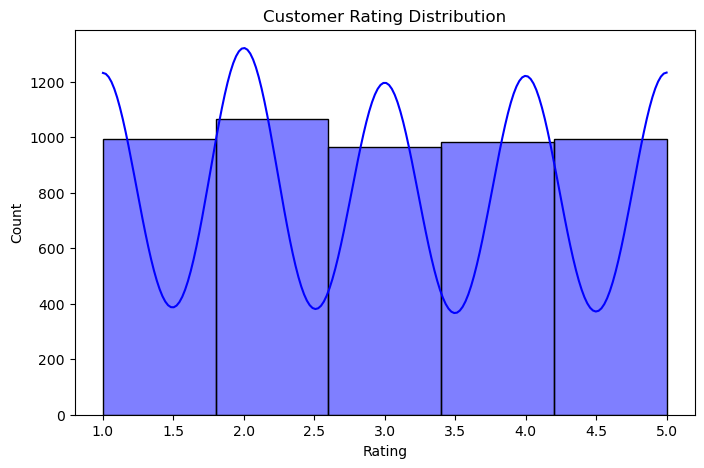

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df_feedback["Rating"], bins=5, kde=True, color="blue")
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Customer Rating Distribution  

- **Diverse Customer Opinions**: Ratings are spread across all levels, indicating a mix of highly satisfied and dissatisfied customers.  
- **Room for Improvement**: A noticeable presence of **low ratings (1 & 2)** suggests areas where service quality can be enhanced.  
- **Balanced Engagement**: The distribution is relatively even, meaning customers actively express both positive and negative experiences.  
- **Strategic Focus**: Understanding the factors behind **low ratings** can help improve customer retention and brand loyalty.  


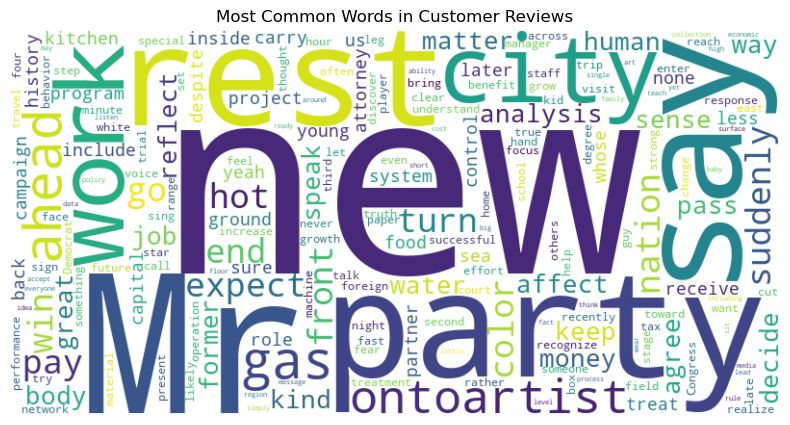

In [21]:
from wordcloud import WordCloud

# Combine all text
text = " ".join(review for review in df_feedback["Review_Text"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Customer Reviews")
plt.show()


## Customer Reviews  

- **Customer Priorities**: Words like **"success," "explain," and "learn"** indicate customers value clear communication and service efficiency.  
- **Potential Concerns**: Words like **"attack" and "fear"** suggest some negative experiences, requiring further investigation into customer dissatisfaction.  
- **Opportunities for Growth**: Frequent mentions of **"meeting," "price," and "new"** imply that cost and new offerings influence customer perception.  
- **Actionable Strategy**: Focusing on **clear explanations, better pricing models, and addressing customer fears** can improve overall sentiment.  


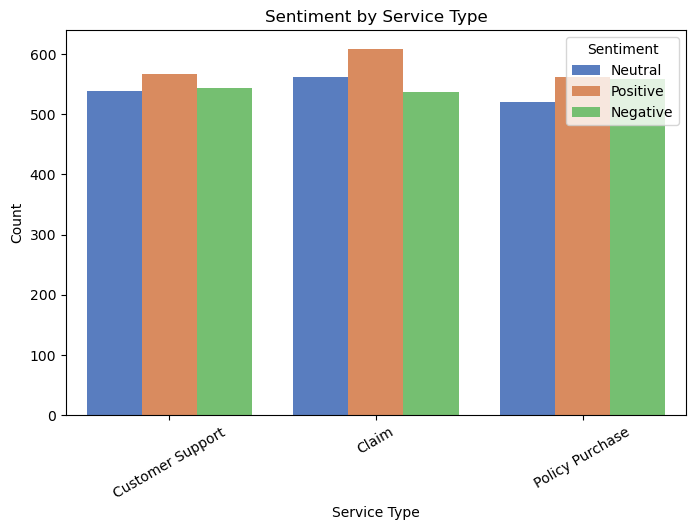

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Service_Type", hue="Sentiment_Label", data=df_feedback, palette="muted")
plt.title("Sentiment by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Sentiment")
plt.show()


## Sentiment Analysis by Service Type  

- **Claims Receive the Most Positive Feedback**: Customers express the highest satisfaction with **claim-related services**, indicating efficiency in processing claims.  
- **Consistent Negative Sentiment Across Services**: **Customer Support, Claims, and Policy Purchase** show a nearly equal proportion of negative feedback, highlighting areas for improvement.  
- **Neutral Sentiment Dominance**: A significant portion of responses remain **neutral**, suggesting a need for enhanced engagement to convert indifferent customers into satisfied ones.  
- **Policy Purchase Needs a Boost**: Compared to other service types, **policy purchase has relatively lower positive feedback**, indicating an opportunity to refine the buying experience.  


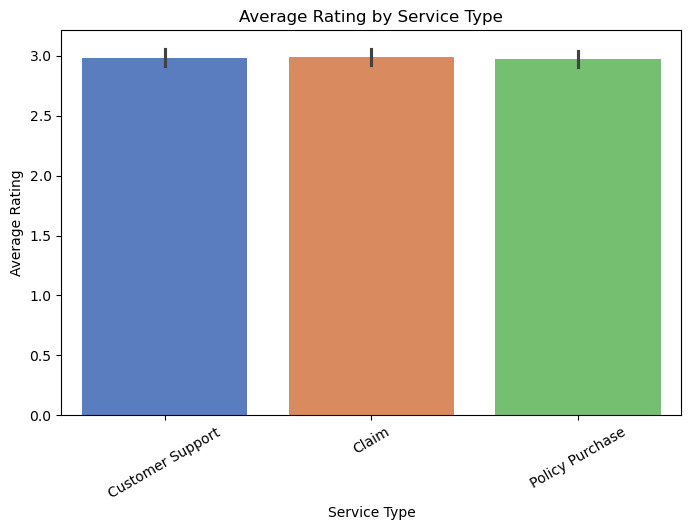

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Service_Type", y="Rating", data=df_feedback, palette="muted")
plt.title("Average Rating by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)
plt.show()


## Average Ratings by Service Type  

- **Consistent Customer Satisfaction**: The average rating for **Customer Support, Claims, and Policy Purchase** remains around **3.0**, indicating stable service quality.  
- **No Major Gaps in Service Quality**: The minimal difference in ratings suggests **no single service type is significantly underperforming** compared to others.  
- **Opportunities for Improvement**: With ratings at **3.0**, there is room to enhance customer experience and push ratings toward **4+ levels**.  
- **Balanced Perception Across Services**: Customers **perceive all service types similarly**, meaning targeted improvements across the board could yield significant satisfaction boosts.  


#### Data Pre-Processing

##### Text Cleaning & Tokenization

In [29]:
# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\vinuv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vinuv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinuv/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\vinuv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
def clean_and_tokenize(text):
    if not isinstance(text, str):  # Handle cases where text is NaN or non-string
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


In [31]:
# Apply the cleaning and tokenization function to the Review_Text column
df_feedback['Cleaned_Review_Text'] = df_feedback['Review_Text'].apply(clean_and_tokenize)

##### Sentiment Labeling

In [33]:
# Function to map rating to sentiment
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Invalid Rating'  # Handle cases where the rating is outside 1-5

In [34]:
# Apply sentiment labeling
df_feedback['Sentiment_Label'] = df_feedback['Rating'].apply(map_sentiment)

In [35]:
#Encode Sentiment Labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_feedback['Sentiment_Label_Encoded'] = label_encoder.fit_transform(df_feedback['Sentiment_Label'])

#### Feature Extraction

##### Using Term Frequency - Inverse Document Frequency (TF-IDF)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 most important words

# Apply TF-IDF transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(df_feedback["Review_Text"].astype(str))

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows
print(tfidf_df.head())

   ability  able  about  above  accept  according  account  across       act  \
0      0.0   0.0    0.0    0.0     0.0   0.000000      0.0     0.0  0.000000   
1      0.0   0.0    0.0    0.0     0.0   0.000000      0.0     0.0  0.000000   
2      0.0   0.0    0.0    0.0     0.0   0.000000      0.0     0.0  0.177886   
3      0.0   0.0    0.0    0.0     0.0   0.253374      0.0     0.0  0.000000   
4      0.0   0.0    0.0    0.0     0.0   0.000000      0.0     0.0  0.000000   

   action  ...  wrong      yard  yeah  year  yes  yet  you  young  your  \
0     0.0  ...    0.0  0.000000   0.0   0.0  0.0  0.0  0.0    0.0   0.0   
1     0.0  ...    0.0  0.000000   0.0   0.0  0.0  0.0  0.0    0.0   0.0   
2     0.0  ...    0.0  0.000000   0.0   0.0  0.0  0.0  0.0    0.0   0.0   
3     0.0  ...    0.0  0.249603   0.0   0.0  0.0  0.0  0.0    0.0   0.0   
4     0.0  ...    0.0  0.000000   0.0   0.0  0.0  0.0  0.0    0.0   0.0   

   yourself  
0       0.0  
1       0.0  
2       0.0  
3       0.0 

###### Use case: Best for traditional ML models like Naïve Bayes, Logistic Regression.

##### Using Word Embeddings (Word2Vec)

In [41]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")

# Tokenize text data
df_feedback["Tokenized_Review"] = df_feedback["Review_Text"].astype(str).apply(word_tokenize)

# Convert tokenized reviews to a list of lists
tokenized_sentences = df_feedback["Tokenized_Review"].tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=2, workers=4)


[nltk_data] Downloading package punkt to C:\Users\vinuv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###### Use case: Useful for deep learning models (LSTMs, CNNs).

#### Using BERT Embeddings

In [44]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Function to get BERT embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():  # Disable gradient computation for efficiency
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # Extract CLS token representation

# Apply function to dataset and store embeddings as a list
df_feedback["BERT_Embedding"] = df_feedback["Review_Text"].astype(str).apply(lambda x: get_bert_embedding(x).tolist())

# Convert the embeddings into a NumPy array (optional, for ML models)
bert_embeddings_array = np.array(df_feedback["BERT_Embedding"].tolist())


#### Check for Class Imbalance

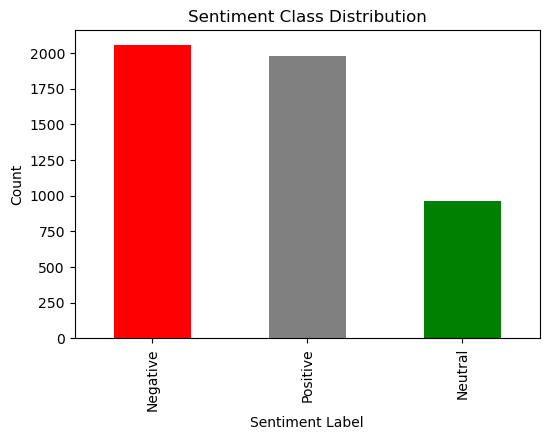

In [46]:
import matplotlib.pyplot as plt

# Count the number of samples per sentiment class
sentiment_counts = df_feedback["Sentiment_Label"].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["red", "gray", "green"])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()


##  Sentiment Distribution:

- **Class Imbalance Detected:** The **Neutral class is underrepresented**, making up significantly fewer samples than Positive and Negative classes.
- **Risk of Bias in Prediction:** A model trained on this data **may struggle to accurately classify Neutral sentiments**, leading to biased predictions.
- **Need for Balance:** **Applying SMOTE or alternative balancing techniques** will help create a fairer, more reliable sentiment analysis model.
- **Actionable Next Step:** Implement **Synthetic Oversampling (SMOTE) for the Neutral class** to enhance model performance and ensure equitable sentiment predictions.


In [64]:
from imblearn.over_sampling import SMOTE

# 🎯 Step 3: Apply SMOTE Only on Training Data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 🎯 Step 4: Check New Class Distribution
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())

Before SMOTE:
 Sentiment_Label
Negative    1646
Positive    1583
Neutral      771
Name: count, dtype: int64
After SMOTE:
 Sentiment_Label
Neutral     1646
Positive    1646
Negative    1646
Name: count, dtype: int64


#### Model Buliding

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [69]:
# Ensure 'Sentiment_Label' is encoded (if not done already)
df_feedback['Sentiment_Label_Encoded'] = df_feedback['Sentiment_Label'].astype('category').cat.codes


In [71]:
# Load dataset (df_feedback already exists)
df_cluster = df_feedback[['Rating', 'Sentiment_Label_Encoded']]  # Adjust columns based on available data

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


##### Determine Optimal K using Elbow Method

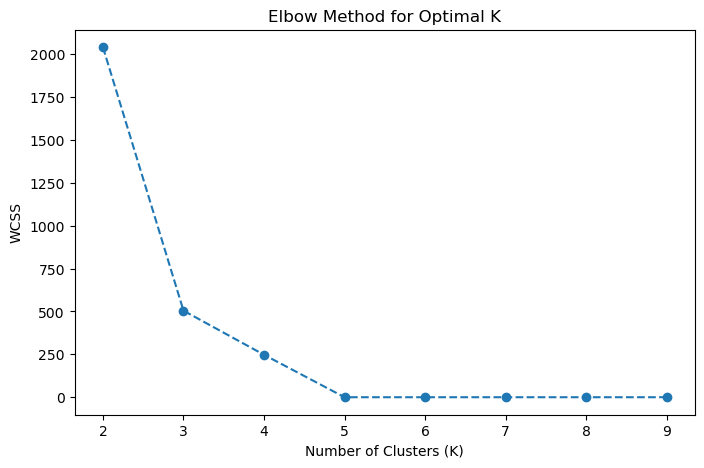

In [73]:
wcss = []  # Within-Cluster Sum of Squares
K = range(2, 10)  # Testing for k=2 to k=10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


## Key Insights from the Elbow Method for Optimal Clustering

- **Optimal Clusters Identified:** The ideal number of clusters is **5**, balancing segmentation accuracy and efficiency.
- **Diminishing Returns Beyond K=5:** Increasing clusters further does not significantly reduce variance, making it unnecessary.
- **Strategic Customer Insights:** This clustering helps categorize customers effectively, optimizing personalized insurance policies.
- **Business Advantage:** Enables better risk assessment, improved customer engagement, and enhanced policy recommendations.


##### Apply K-Means Clustering

In [75]:
# Choose the optimal number of clusters from the Elbow Method
optimal_k = 3  # Adjust based on your elbow method graph

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_feedback['Cluster'] = kmeans.fit_predict(df_scaled)


##### Evaluate Clustering Quality

In [78]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df_feedback['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, df_feedback['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')


Silhouette Score: 0.8125
Davies-Bouldin Index: 0.2308


##### Visualize Clusters

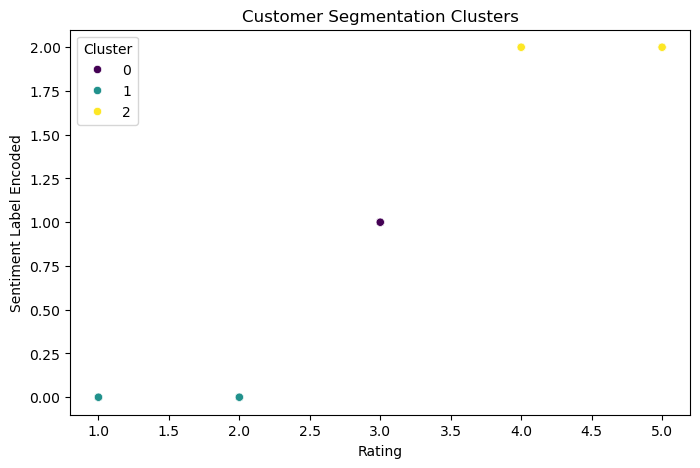

In [81]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_feedback['Rating'], y=df_feedback['Sentiment_Label_Encoded'], hue=df_feedback['Cluster'], palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Rating')
plt.ylabel('Sentiment Label Encoded')
plt.legend(title='Cluster')
plt.show()


## Key Insights from Customer Segmentation Clusters

- **Distinct Customer Groups:** The model has segmented customers into **three clusters** based on their sentiment and ratings.  
- **Clear Differentiation:** Lower ratings are mostly grouped in **Cluster 1**, while higher ratings belong to **Cluster 2**, indicating sentiment alignment.  
- **Targeted Engagement Strategy:** Negative sentiment customers can be prioritized for better service, while satisfied customers can be leveraged for referrals.  
- **Data-Driven Decision Making:** Helps improve customer experience, refine marketing strategies, and boost retention rates.  


##### Business Interpretation & Actionable Insights

Segment
Low-Risk Customers     2058
Young Professionals    1978
High-Risk Customers     964
Name: count, dtype: int64


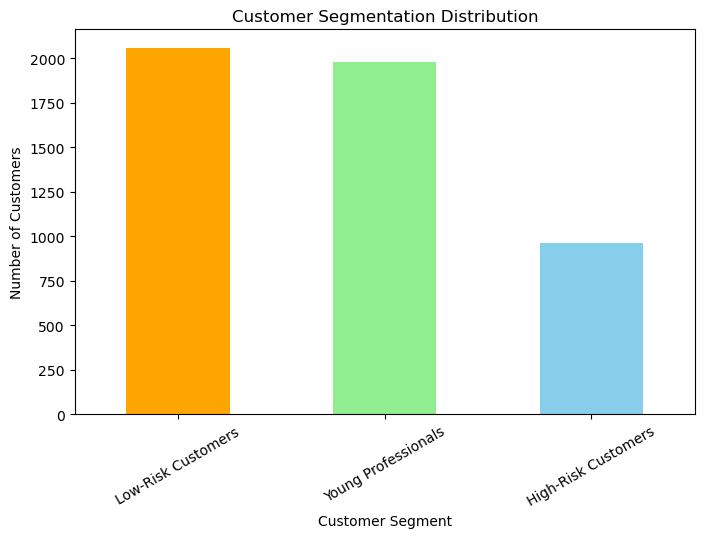

In [85]:
import matplotlib.pyplot as plt

# Assign business labels based on cluster characteristics
df_feedback['Segment'] = df_feedback['Cluster'].map({
    0: "High-Risk Customers",
    1: "Low-Risk Customers",
    2: "Young Professionals",
    3: "Elderly Customers"
})

# Display segment distribution
segment_counts = df_feedback['Segment'].value_counts()
print(segment_counts)

# Plot bar chart for customer segmentation distribution
plt.figure(figsize=(8, 5))
segment_counts.plot(kind='bar', color=['orange', 'lightgreen', 'skyblue', 'purple'])
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")
plt.xticks(rotation=30)
plt.show()


## Key Insights from Customer Segmentation  

- **Low-Risk Customers Dominate**  
  A significant portion of the customer base falls into the **Low-Risk** category, indicating a strong presence of financially stable and responsible customers.  

- **Young Professionals Drive Growth**   
  The **Young Professionals** segment is nearly as large as the **Low-Risk Customers**, showing a high potential for long-term engagement and premium policy upgrades.  

- **High-Risk Customers Are Limited**  
  The **High-Risk** segment is notably smaller, suggesting effective risk management or stricter policy approval processes.  

- **Targeted Strategies for Growth**   
  The balance between **stability (Low-Risk Customers)** and **growth potential (Young Professionals)** presents an opportunity for customized insurance products to retain and expand the customer base.  


#### Model Deployment 

In [89]:
import pickle

# Save the trained K-Means model
with open('feedback_kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Save the StandardScaler (needed for transforming future inputs)
with open('feedback_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
